In [388]:
# Add dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [389]:
# Load the dataset

df = pd.read_csv("bigsums.csv")
df.head()

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,Spawn Rate,Statistics Weight,Notifications Weight,Get Accounts Weight,Put Accounts Weight,Unnamed: 29
0,1745543684,10,NaN,Aggregated,0.0,0.0,93.0,100.0,140.0,150.0,...,90.837438,15.6591,176.8549,180.000000,12,8,32,2,32,NaN
1,1745543685,20,NaN,Aggregated,0.0,0.0,99.0,120.0,140.0,150.0,...,95.811046,15.6591,177.2617,177.500000,12,8,32,2,32,NaN
2,1745543686,30,NaN,Aggregated,34.0,4.0,120.0,140.0,160.0,160.0,...,116.925769,15.6591,240.5976,175.438596,12,8,32,2,32,NaN
3,1745543687,60,NaN,Aggregated,36.0,6.0,120.0,150.0,170.0,200.0,...,137.324562,15.6591,358.3542,176.666667,12,8,32,2,32,NaN
4,1745543688,72,NaN,Aggregated,31.0,6.0,130.0,150.0,170.0,180.0,...,136.215680,15.6591,358.3542,176.048780,12,8,32,2,32,NaN


In [390]:
df

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,Spawn Rate,Statistics Weight,Notifications Weight,Get Accounts Weight,Put Accounts Weight,Unnamed: 29
0,1745543684,10,NaN,Aggregated,0.0,0.0,93.0,100.0,140.0,150.0,...,90.837438,15.6591,176.8549,180.000000,12,8,32,2,32,NaN
1,1745543685,20,NaN,Aggregated,0.0,0.0,99.0,120.0,140.0,150.0,...,95.811046,15.6591,177.2617,177.500000,12,8,32,2,32,NaN
2,1745543686,30,NaN,Aggregated,34.0,4.0,120.0,140.0,160.0,160.0,...,116.925769,15.6591,240.5976,175.438596,12,8,32,2,32,NaN
3,1745543687,60,NaN,Aggregated,36.0,6.0,120.0,150.0,170.0,200.0,...,137.324562,15.6591,358.3542,176.666667,12,8,32,2,32,NaN
4,1745543688,72,NaN,Aggregated,31.0,6.0,130.0,150.0,170.0,180.0,...,136.215680,15.6591,358.3542,176.048780,12,8,32,2,32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21071,1745626425,66,NaN,Aggregated,9.6,0.0,240.0,540.0,810.0,1000.0,...,524.100589,9.0387,4020.0655,80.902497,16,8,128,8,128,NaN
21072,1745626426,66,NaN,Aggregated,10.0,0.0,230.0,540.0,810.0,1000.0,...,522.624996,9.0387,4020.0655,80.666755,16,8,128,8,128,NaN
21073,1745626427,66,NaN,Aggregated,10.5,0.0,230.0,540.0,800.0,1000.0,...,521.342098,9.0387,4020.0655,80.453633,16,8,128,8,128,NaN
21074,1745626428,66,NaN,Aggregated,10.5,0.0,230.0,530.0,800.0,1000.0,...,520.287918,9.0387,4020.0655,80.422884,16,8,128,8,128,NaN


Total Request Count
Spawn Rate
Statistics Weight
Notifications Weight
Get Accounts Weight
Put Accounts Weight
Total Failure Count
User Count


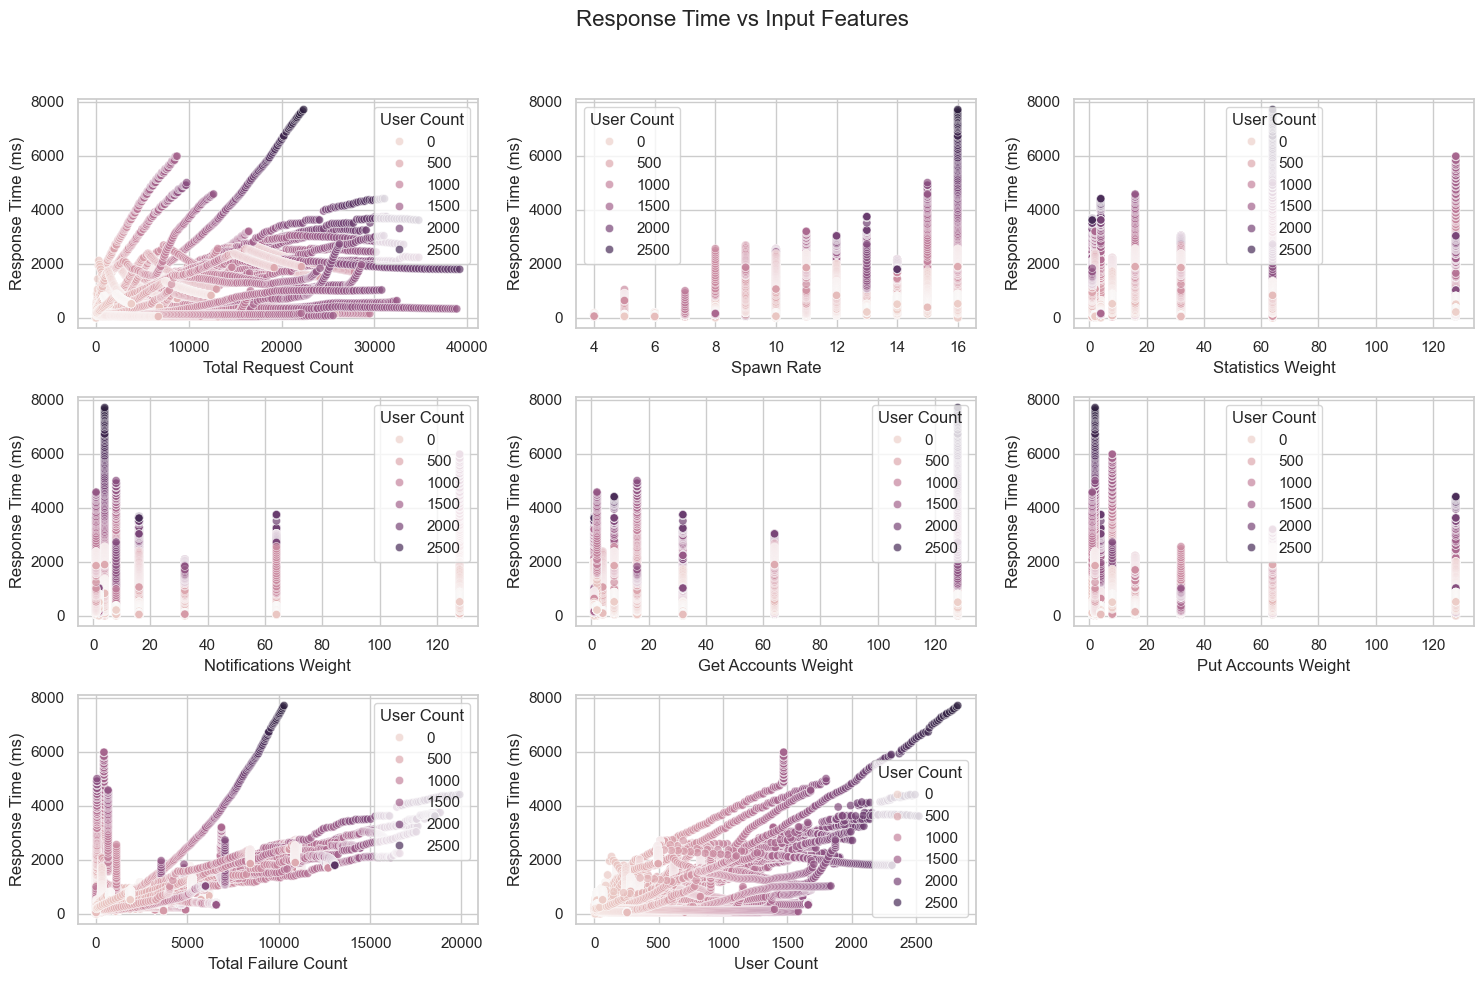

In [391]:
# ======= New: Plot Response Time vs Features =======
# This is mainly for data exploration to understand the relationship between response time and the experiment parameters.
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
fig.suptitle("Response Time vs Input Features", fontsize=16)

features = ["Total Request Count", "Spawn Rate", "Statistics Weight","Notifications Weight","Get Accounts Weight","Put Accounts Weight" ,"Total Failure Count","User Count"]#The last two are just to make up the numbers. 
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Position in subplot grid
    print(feature)
    sns.scatterplot(ax=axes[row, col], x=df[feature], y=df["Total Average Response Time"], alpha=0.7, hue=df["User Count"])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Response Time (ms)")

# Hide the last subplot if there are fewer than 6 plots
axes[2, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

In [392]:
small=pd.read_csv("nooverfit.csv")
# Features and target
smallX = small[["Total Request Count", "Spawn Rate", "Statistics Weight","Notifications Weight","Get Accounts Weight","Put Accounts Weight" ,"User Count"]]#The last two are just to make up the numbers. 

smally = small["Total Average Response Time"]

# Split into training and testing sets
smX_train, smX_test, smy_train, smy_test = train_test_split(smallX, smally, test_size=0.2, random_state=42)
# Create a pipeline with scaling and the Random Forest model
smallpipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize features
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Step 2: Train model
])
# Train the model by fitting the pipeline
# TODO: perform hyperparameter tuning
smallpipeline.fit(smX_train, smy_train)
# Perform 10-fold cross-validation
skf = KFold(n_splits=3, shuffle=True, random_state=42)
scv_scores = cross_val_score(smallpipeline, smX_train, smy_train, cv=skf, scoring='r2')

print(f"Cross-Validation R^2 Scores: {scv_scores}")
print(f"Mean R^2 Score: {scv_scores.mean():.4f}")

Cross-Validation R^2 Scores: [0.59472507 0.3341868  0.46810997]
Mean R^2 Score: 0.4657


In [393]:
# Features and target
X = df[["Total Request Count", "Spawn Rate", "Statistics Weight","Notifications Weight","Get Accounts Weight","Put Accounts Weight" ,"User Count"]]#The last two are just to make up the numbers. 

y = df["Total Average Response Time"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [394]:
# Create a pipeline with scaling and the Random Forest model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize features
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Step 2: Train model
])
# Train the model by fitting the pipeline
# TODO: perform hyperparameter tuning
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [395]:
# Perform 10-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean R^2 Score: {cv_scores.mean():.4f}")


Cross-Validation R^2 Scores: [0.99624237 0.99686929 0.99743853]
Mean R^2 Score: 0.9969


In [396]:
# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=kf, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)

In [397]:
# Compute mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

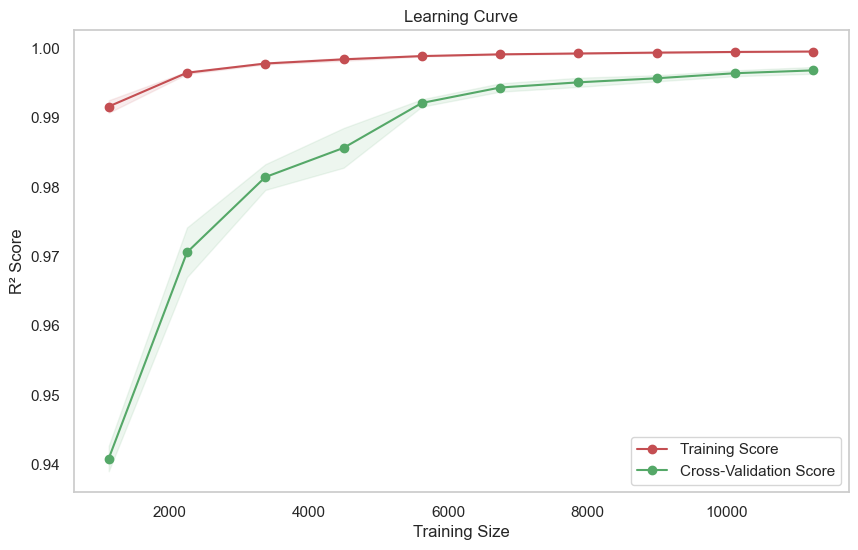

In [398]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

Total Request Count
Spawn Rate
Statistics Weight
Notifications Weight
Get Accounts Weight
Put Accounts Weight
Total Failure Count
User Count


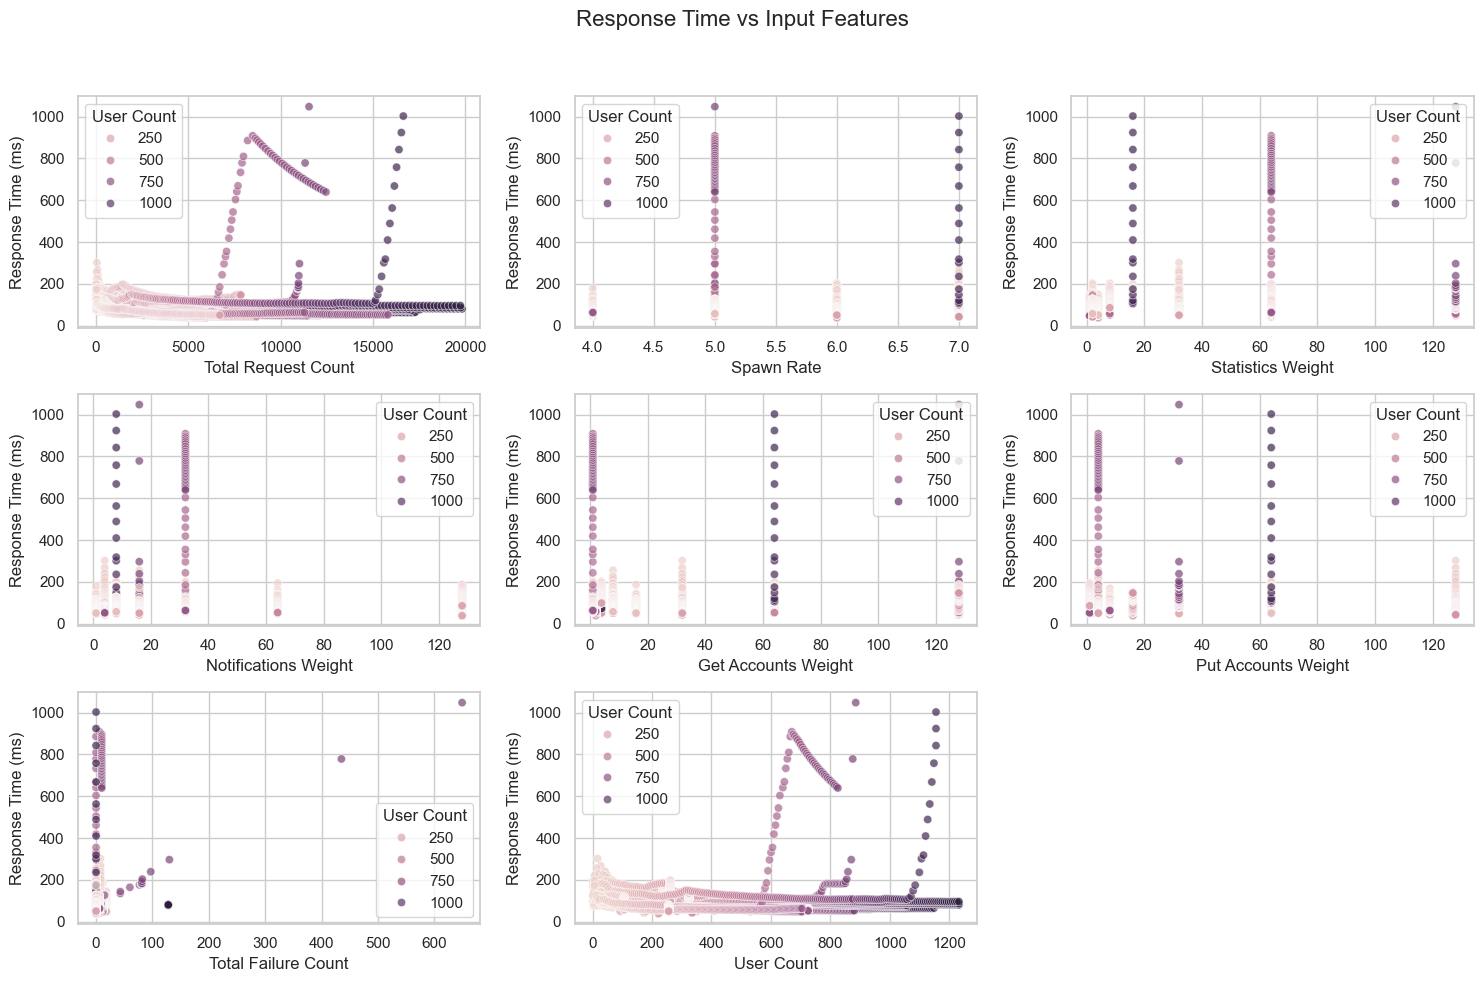

In [399]:
dfcut=df[df["Spawn Rate"]<8]
dfcut

# ======= New: Plot Response Time vs Features =======
# This is mainly for data exploration to understand the relationship between response time and the experiment parameters.
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
fig.suptitle("Response Time vs Input Features", fontsize=16)

features = ["Total Request Count", "Spawn Rate", "Statistics Weight","Notifications Weight","Get Accounts Weight","Put Accounts Weight" ,"Total Failure Count","User Count"]#The last two are just to make up the numbers. 
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Position in subplot grid
    print(feature)
    sns.scatterplot(ax=axes[row, col], x=dfcut[feature], y=dfcut["Total Average Response Time"], alpha=0.7, hue=dfcut["User Count"])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Response Time (ms)")

# Hide the last subplot if there are fewer than 6 plots
axes[2, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

In [400]:
# Use the model to find the best resource allocation for a response time less than 60 seconds
#features = ["tot", "inc", "place", "counts-/accounts/", "counts-get-/accounts/current", "counts-/notifications/recipients/current","counts-put-/accounts/current", "counts-/statistics/current","Average Response Time",]#The last two are just to make up the numbers. 

features = ["Total Request Count", "Spawn Rate", "Statistics Weight","Notifications Weight","Get Accounts Weight","Put Accounts Weight" ,"Total Failure Count","User Count"]#The last two are just to make up the numbers. 

for i in range(80,181,5):
    new_observation = pd.DataFrame({
        
        "Total Request Count":[i*15],
        "Spawn Rate":[8],
        "Statistics Weight":[9],
        "Notifications Weight":[4],
        "Get Accounts Weight":[2],
        "Put Accounts Weight":[1],
        "User Count":[i*8]
    })

    # Predict response time for the new observation
    predicted_response_time = pipeline.predict(new_observation)
    print(f"Predicted Response Time: {predicted_response_time[0]:.4f} milliseconds")
    if predicted_response_time[0] > 600:
        print(f"Most potential clients: {i*15}")
        break

Predicted Response Time: 119.7207 milliseconds
Predicted Response Time: 118.0973 milliseconds
Predicted Response Time: 124.1793 milliseconds
Predicted Response Time: 419.9408 milliseconds
Predicted Response Time: 432.5121 milliseconds
Predicted Response Time: 452.4716 milliseconds
Predicted Response Time: 474.1509 milliseconds
Predicted Response Time: 459.2345 milliseconds
Predicted Response Time: 446.0748 milliseconds
Predicted Response Time: 431.4633 milliseconds
Predicted Response Time: 431.2114 milliseconds
Predicted Response Time: 434.1853 milliseconds
Predicted Response Time: 438.2636 milliseconds
Predicted Response Time: 439.6843 milliseconds
Predicted Response Time: 392.6533 milliseconds
Predicted Response Time: 374.3213 milliseconds
Predicted Response Time: 315.3060 milliseconds
Predicted Response Time: 321.6885 milliseconds
Predicted Response Time: 243.6301 milliseconds
Predicted Response Time: 121.0208 milliseconds
Predicted Response Time: 135.3920 milliseconds


In [401]:
# Features and target
X2 = df[["User Count", "Spawn Rate", "Total Request Count"]] 

y2 = df["Total Failure Count"]

# Split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [402]:
# Create a pipeline with scaling and the Random Forest model
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize features
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Step 2: Train model
])
# Train the model by fitting the pipeline
# TODO: perform hyperparameter tuning
pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [403]:
pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [404]:
kf2 = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores2 = cross_val_score(pipeline2, X_train2, y_train2, cv=kf2, scoring='r2')

print(f"Cross-Validation R^2 Scores: {cv_scores2}")
print(f"Mean R^2 Score: {cv_scores2.mean():.4f}")


Cross-Validation R^2 Scores: [0.95588016 0.95646173 0.96377183]
Mean R^2 Score: 0.9587


In [405]:
train_sizes2, train_scores2, test_scores2 = learning_curve(
    pipeline2, X_train2, y_train2, cv=kf2, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 50)
)

In [406]:
train_mean2 = np.mean(train_scores2, axis=1)
train_std2= np.std(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)

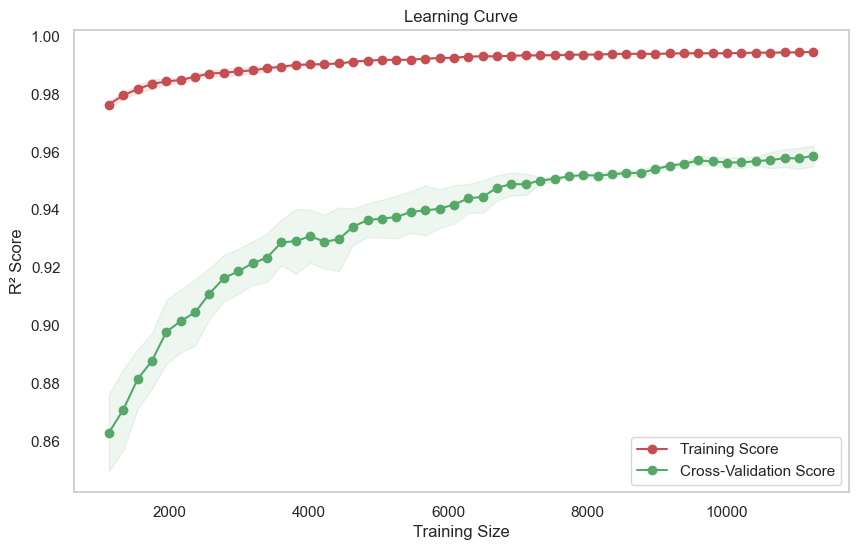

In [407]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes2, train_mean2, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes2, train_mean2 - train_std2, train_mean2 + train_std2, alpha=0.1, color="r")
plt.plot(train_sizes2, test_mean2, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes2, test_mean2 - test_std2, test_mean2 + test_std2, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

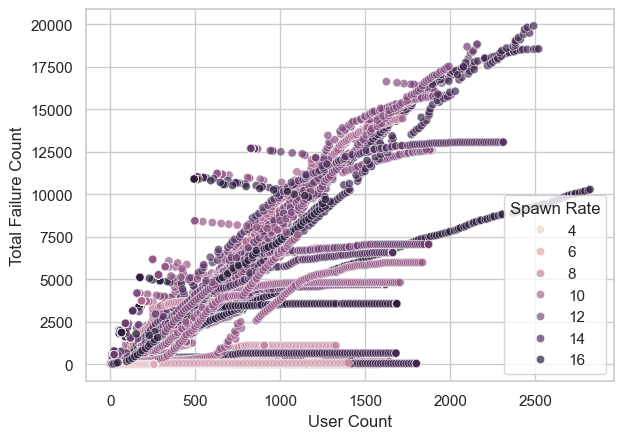

In [408]:


if(True):
    row, col = (0,0) 
    sns.scatterplot( x=df["User Count"], y=df["Total Failure Count"], hue=df["Spawn Rate"], alpha=0.7)
    axes[row, col].set_xlabel("Spawn Rate")
    axes[row, col].set_ylabel("Failure Count per user")


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

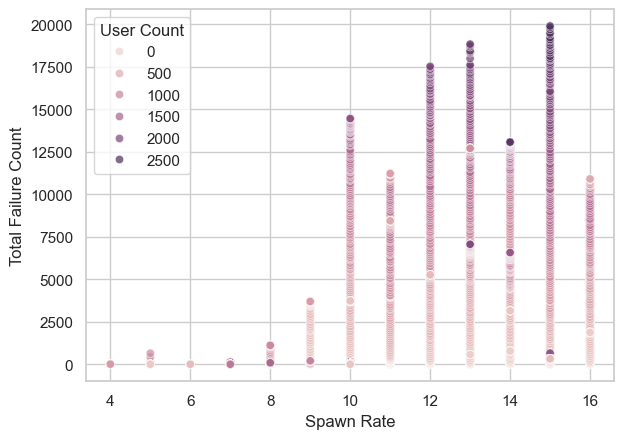

In [409]:


if(True):
    row, col = (0,0) 
    sns.scatterplot( x=df["Spawn Rate"], y=df["Total Failure Count"], hue=df["User Count"], alpha=0.7)


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

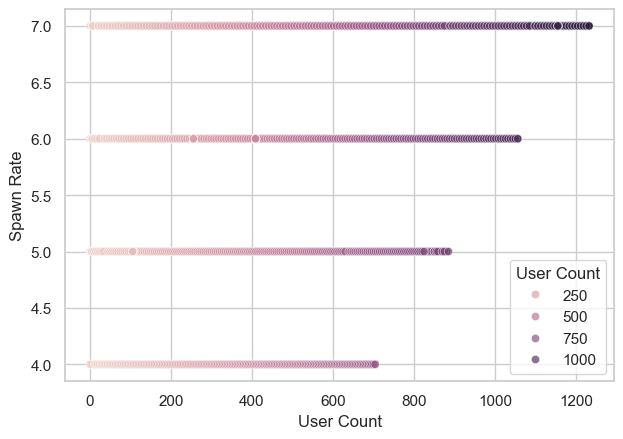

In [410]:
bf=df[df["Spawn Rate"]<8]

if(True):
    row, col = (0,0) 
    sns.scatterplot( x=bf["User Count"], y=bf["Spawn Rate"], hue=bf["User Count"], alpha=0.7)
    axes[row, col].set_xlabel("Spawn Rate")
    axes[row, col].set_ylabel("Failure Count per user")


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

In [423]:
testdata=pd.read_csv("testdata.csv")
sum=0
num=0
pred=[]
smallpred=[]
smalldiff=[]
real=[]
diffs=[]
for index, row in testdata.iterrows():
    new_observation = pd.DataFrame({
        
        "Total Request Count":[row["Total Request Count"]],
        "Spawn Rate":[row["Spawn Rate"]],
        "Statistics Weight":[row["Statistics Weight"]],
        "Notifications Weight":[row["Notifications Weight"]],
        "Get Accounts Weight":[row["Get Accounts Weight"]],
        "Put Accounts Weight":[row["Put Accounts Weight"]],
        "User Count":[row["User Count"]]
    })

    # Predict response time for the new observation
    predicted_response_time = pipeline.predict(new_observation)
    smallp=smallpipeline.predict(new_observation)
    print(f"Predicted Response Time: {predicted_response_time[0]:.4f} milliseconds")
    print(f"SmallPredicted Response Time: {smallp[0]:.4f} milliseconds")
    print(f"True Response Time: {row["Total Average Response Time"]:.4f} milliseconds")
    diff=predicted_response_time[0]-row["Total Average Response Time"]
    print(f"Diff: {diff:.4f} milliseconds")
    sum=sum+row["Total Average Response Time"]
    num=num+1
    smallpred.append(smallp)
    pred.append(predicted_response_time[0])
    real.append(row["Total Average Response Time"])
    diffs.append(diff)


    
    

Predicted Response Time: 96.2880 milliseconds
SmallPredicted Response Time: 120.6495 milliseconds
True Response Time: 95.9598 milliseconds
Diff: 0.3282 milliseconds
Predicted Response Time: 91.1439 milliseconds
SmallPredicted Response Time: 120.6495 milliseconds
True Response Time: 89.8543 milliseconds
Diff: 1.2895 milliseconds
Predicted Response Time: 90.3897 milliseconds
SmallPredicted Response Time: 123.2412 milliseconds
True Response Time: 89.9132 milliseconds
Diff: 0.4765 milliseconds
Predicted Response Time: 90.8788 milliseconds
SmallPredicted Response Time: 123.2412 milliseconds
True Response Time: 91.1539 milliseconds
Diff: -0.2751 milliseconds
Predicted Response Time: 90.6777 milliseconds
SmallPredicted Response Time: 123.2412 milliseconds
True Response Time: 90.9817 milliseconds
Diff: -0.3041 milliseconds
Predicted Response Time: 89.9796 milliseconds
SmallPredicted Response Time: 118.8114 milliseconds
True Response Time: 89.5721 milliseconds
Diff: 0.4075 milliseconds
Predicte

In [412]:
smallerror=np.array(smallpred)-np.array(real)
smallerror

array([[   24.68968243,    30.79513243,    30.73632053, ...,
        -3581.43668365, -3587.58217159, -3681.27742574],
       [   24.68968243,    30.79513243,    30.73632053, ...,
        -3581.43668365, -3587.58217159, -3681.27742574],
       [   27.28143   ,    33.38688   ,    33.32806809, ...,
        -3578.84493608, -3584.99042402, -3678.68567818],
       ...,
       [  811.35648277,   817.46193277,   817.40312086, ...,
        -2794.76988331, -2800.91537125, -2894.61062541],
       [  811.35648277,   817.46193277,   817.40312086, ...,
        -2794.76988331, -2800.91537125, -2894.61062541],
       [  811.35648277,   817.46193277,   817.40312086, ...,
        -2794.76988331, -2800.91537125, -2894.61062541]],
      shape=(2535, 2535))

In [413]:
print(num)
print(sum)
average=sum/num
print(average)

2535
1924476.8402434115
759.1624616344818


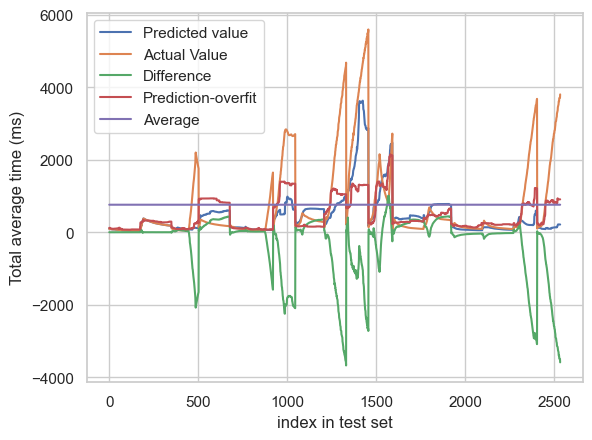

array([[<Axes: xlabel='Spawn Rate', ylabel='Failure Count per user'>,
        <Axes: xlabel='Spawn Rate', ylabel='Response Time (ms)'>,
        <Axes: xlabel='Statistics Weight', ylabel='Response Time (ms)'>],
       [<Axes: xlabel='Notifications Weight', ylabel='Response Time (ms)'>,
        <Axes: xlabel='Get Accounts Weight', ylabel='Response Time (ms)'>,
        <Axes: xlabel='Put Accounts Weight', ylabel='Response Time (ms)'>],
       [<Axes: xlabel='Total Failure Count', ylabel='Response Time (ms)'>,
        <Axes: xlabel='User Count', ylabel='Response Time (ms)'>,
        <Axes: >]], dtype=object)

In [421]:
plt.plot(pred, label="Predicted value")
plt.plot(real, label="Actual Value")
plt.plot(diffs, label="Difference")
plt.plot(smallpred, label="Prediction-overfit")
plt.plot(np.ones_like(pred)*average,label="Average")
plt.legend()
plt.ylabel("Total average time (ms)")
plt.xlabel("index in test set")
plt.show()
axes

In [427]:
mean_squared_error_full=np.mean(np.square(np.array(diffs)))
print(mean_squared_error_full)
mean_abs_error_full=np.mean(np.abs(np.array(diffs)))
print(mean_abs_error_full)


823231.0085753247
482.74274725087014


In [420]:
mean_squared_error_full=np.mean(np.square(smallerror))
print(mean_squared_error_full)
mean_abs_error_full=np.mean(np.abs(smallerror))
print(mean_abs_error_full)


1529769.9027214916
765.0945875573047


In [417]:

sum2=0
pred2=[]
real2=[]
diffs2=[]
for index, row in testdata.iterrows():
    new_observation = pd.DataFrame({
        
        "User Count":[row["User Count"]],
        "Spawn Rate":[row["Spawn Rate"]],
        "Total Request Count":[row["Total Request Count"]]
    })

    # Predict response time for the new observation
    predicted_response_time = pipeline2.predict(new_observation)
    print(f"Predicted Value: {predicted_response_time[0]:.4f} ")
    print(f"True Value: {row["Total Failure Count"]:.4f}")
    diff=predicted_response_time[0]-row["Total Failure Count"]
    print(f"Diff: {diff:.4f}")
    sum2=sum2+row["Total Failure Count"]
    pred2.append(predicted_response_time[0])
    real2.append(row["Total Failure Count"])
    diffs2.append(diff)
    #averdiff=predicted_response_time[0]-average
    #print(f"Diff from average: {averdiff:.4f} milliseconds")

Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.3600 
True Value: 0.0000
Diff: 0.3600
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.0800 
True Value: 0.0000
Diff: 0.0800
Predicted Value: 0.0800 
True Value: 0.0000
Diff: 0.0800
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.3400 
True Value: 0.0000
Diff: 0.3400
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.3400 
True Value: 0.0000
Diff: 0.3400
Predicted Value: 0.0000 
True Value: 0.0000
Diff: 0.0000
Predicted Value: 0.0800 
True Value: 0.0000
Diff: 0.0800
Predicted Value: 0.1800 
True Value: 0.0000
Diff: 0.1800
Predicted Value: 1.1453 
True Value: 0.0000
Diff: 1.1453
Predicted Value: 0.0000 
True V

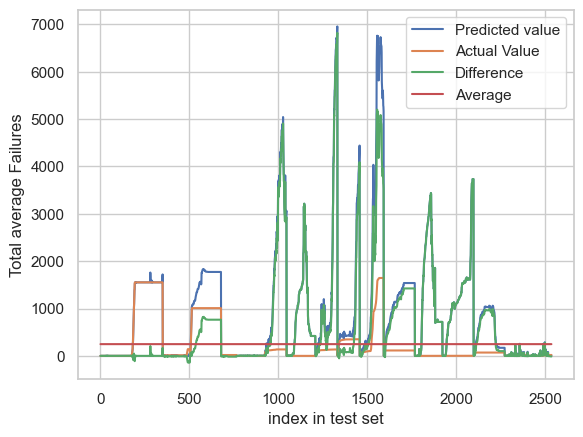

array([[<Axes: xlabel='Spawn Rate', ylabel='Failure Count per user'>,
        <Axes: xlabel='Spawn Rate', ylabel='Response Time (ms)'>,
        <Axes: xlabel='Statistics Weight', ylabel='Response Time (ms)'>],
       [<Axes: xlabel='Notifications Weight', ylabel='Response Time (ms)'>,
        <Axes: xlabel='Get Accounts Weight', ylabel='Response Time (ms)'>,
        <Axes: xlabel='Put Accounts Weight', ylabel='Response Time (ms)'>],
       [<Axes: xlabel='Total Failure Count', ylabel='Response Time (ms)'>,
        <Axes: xlabel='User Count', ylabel='Response Time (ms)'>,
        <Axes: >]], dtype=object)

In [418]:
average2=sum2/num
plt.plot(pred2, label="Predicted value")
plt.plot(real2, label="Actual Value")
plt.plot(diffs2, label="Difference")
plt.plot(np.ones_like(pred2)*average2,label="Average")
plt.legend()
plt.ylabel("Total average Failures")
plt.xlabel("index in test set")
plt.show()
axes

In [428]:
pd.read_csv("shortruns.csv")

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,99.99%,100%,tot,inc,place,counts-/accounts/,counts-get-/accounts/current,counts-/notifications/recipients/current,counts-put-/accounts/current,counts-/statistics/current
0,1745630768,6,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000,0.0000,0.000000,8,8,64,16,16,NaN
1,1745630769,12,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000,0.0000,0.000000,8,8,64,16,16,NaN
2,1745630770,18,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000,0.0000,0.000000,8,8,64,16,16,NaN
3,1745630771,30,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000,0.0000,0.000000,8,8,64,16,16,NaN
4,1745630772,36,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000,0.0000,0.000000,8,8,64,16,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1745636458,126,NaN,Aggregated,23.0,0.0,87.0,110.0,120.0,130.0,...,94.863313,18.279,368.9086,131.028011,3,1,1,1,1,NaN
5561,1745636459,129,NaN,Aggregated,23.7,0.0,85.0,110.0,120.0,130.0,...,93.970094,18.279,368.9086,130.554348,3,1,1,1,1,NaN
5562,1745636460,132,NaN,Aggregated,24.9,0.0,84.0,110.0,120.0,130.0,...,92.239740,13.885,368.9086,131.555699,3,1,1,1,1,NaN
5563,1745636461,135,NaN,Aggregated,24.1,0.0,83.0,110.0,120.0,130.0,...,90.951093,13.885,368.9086,131.338791,3,1,1,1,1,NaN
